<a href="https://colab.research.google.com/github/AanAkbar/BikeDataShare/blob/main/Dicoding_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyek Analisis Data : Bike Sharing

+ Nama          : Akbar Maulana
+ Email         : akbar20002@mail.unpad.ac.id
+ ID Dicoding   : akbar_maulana_znge



### Menentukan Pertanyaan Bisnis

+ Bulan berapa puncak penyewaan sepeda terjadi?
+ Pada musim apa orang banyak merentas sepeda?
+ Bagaimana pengaruh banyaknya penyewa terhadap suhu udara?

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/day.csv"
data = pd.read_csv(path)
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
bikes = data
bikes

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Cleaning Data

In [ ]:
missing_values = bikes.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Processing Dataset

In [ ]:
bikes.season.value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [ ]:
season_dict = {
    '1':'spring',
    '2':'summer',
    '3':'autumn',
    '4':'winter'
}
bikes.season = bikes.season.astype('str')
bikes.season = bikes.season.map(season_dict)

## Exploratory Data Analysis (EDA)

In [ ]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Visualization & Explanatory Analysis

Petanyaan 1
+ Bulan berapa puncak penyewaan sepeda terjadi?

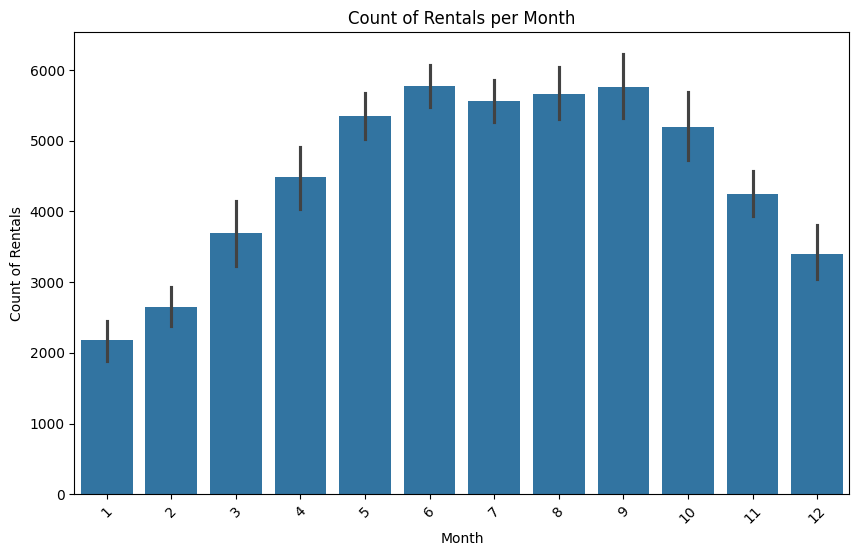

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data=bikes)
plt.title('Count of Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Count of Rentals')
plt.xticks(rotation = 45)
plt.show()

Pertanyaan 2
+ Pada musim apa orang banyak merentas sepeda?

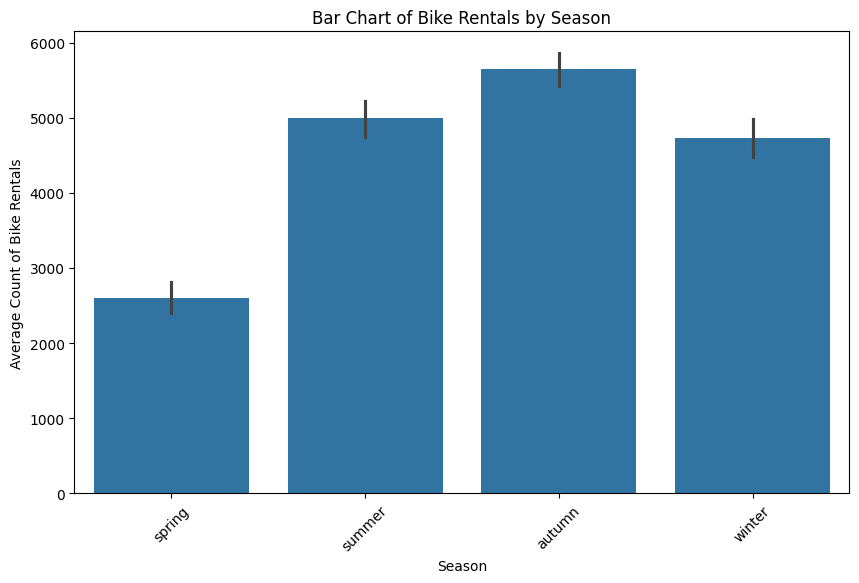

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=bikes)
plt.title('Bar Chart of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Count of Bike Rentals')
plt.xticks(rotation = 45)
plt.show()

Pertanyaan 3
+ Bagaimana pengaruh banyaknya penyewa terhadap suhu udara?

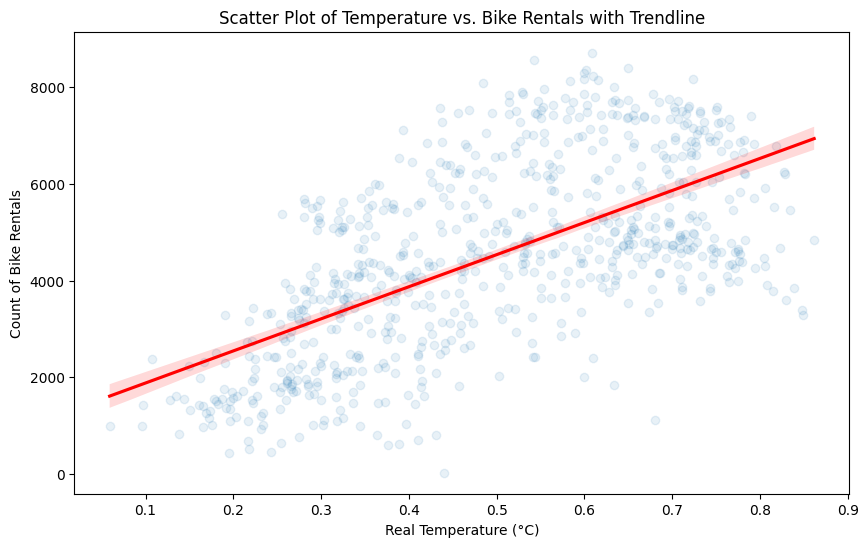

In [ ]:
plt.figure(figsize = (10, 6))
sns.regplot(x = 'temp', y = 'cnt', data = bikes, scatter_kws = {'alpha':0.1}, line_kws = {'color': 'red'})
plt.title('Scatter Plot of Temperature vs. Bike Rentals with Trendline')
plt.xlabel('Real Temperature (°C)')
plt.ylabel('Count of Bike Rentals')
plt.show()

### Conclusion
+ Bulan berapa puncak penyewaan sepeda terjadi?
Dapat kita lihat pada diagram batang diatas bahwa puncak penyewaan sepeda terjadi pada bulan 6-9 dengan puncaknya terjadi dibulan 9. Pada bulan 9 sepeda yang disewa diketahui sekitas 6000 lebih sepeda. Dengan begitu dapat disimpulkan bahwa puncak penyewaaan sepeda terjadi di bulan 9.